### Dataset link : https://www.kaggle.com/code/shubham47/campus-placement-analysis/data

### Import the library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# last 5 rows of the dataset
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
# shape of the dataset
df.shape

(215, 15)

In [7]:
# number of rows and columns
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 215
Number of Columns 15


In [9]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
# checking for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
# statistics about the dataset
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Exploratory Data Analysis

In [12]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

#### How Many Students Got Placed?

In [14]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [15]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

#### Could you display the top 5 sci&tech students placed according to their salary?

In [20]:
df[(df['degree_t'] == 'Sci&Tech') & (df['status'] == 'Placed')]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
23,24,F,77.40,Others,60.00,Others,Science,64.74,Sci&Tech,Yes,92.00,Mkt&Fin,63.62,Placed,300000.0
24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
37,38,F,79.00,Central,76.00,Central,Science,65.60,Sci&Tech,No,58.00,Mkt&HR,55.47,Placed,320000.0
39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
59,60,M,52.60,Central,65.58,Others,Science,72.11,Sci&Tech,No,57.60,Mkt&Fin,56.66,Placed,265000.0


In [21]:
df[(df['degree_t'] == 'Sci&Tech') & (df['status'] == 'Placed')].sort_values(by='salary', ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [22]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [23]:
# dropping the unwanted columns
df = df.drop(columns=['sl_no', 'salary'], axis = 1)

In [24]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [26]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = label.fit_transform(df[col])

In [27]:
# after applying the label-encoding
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.8,1


### Splitting into independent and dependent feature

In [28]:
x = df.drop(columns=['status'], axis = 1)
y = df['status']

### Splitting the data into train and test

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Import the models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
# Training the model 
log = LogisticRegression()
log.fit(x_train,y_train)

svm = SVC()
svm.fit(x_train,y_train)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [32]:
# Prediction on Test Data
y_pred1 = log.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = knn.predict(x_test)
y_pred4 = dt.predict(x_test)
y_pred5 = rf.predict(x_test)
y_pred6 = gb.predict(x_test)

In [33]:
# Evaluating the model
from sklearn.metrics import accuracy_score

In [34]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [35]:
print(score1,score2,score3,score4,score5,score6)

0.8837209302325582 0.813953488372093 0.813953488372093 0.7674418604651163 0.813953488372093 0.8372093023255814


In [41]:
final_data = pd.DataFrame({'Models':['LOG','SVC','KNN','DT','RF','GB'],
            'Accuracy':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100]})

In [42]:
final_data

,Models,Accuracy
0,LOG,88.372093
1,SVC,81.395349
2,KNN,81.395349
3,DT,76.744186
4,RF,81.395349
5,GB,83.720930


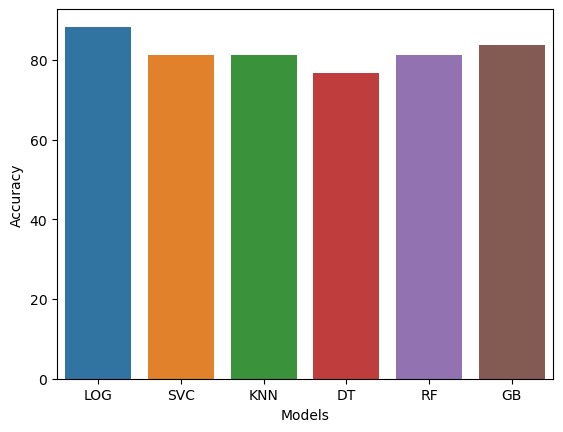

In [44]:
sns.barplot(x = 'Models', y = 'Accuracy', data = final_data)
plt.show()

### Prediction on New Data

In [45]:
test_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'mba_p':58.8,   
},index=[0])

In [46]:
log= LogisticRegression()
log.fit(x,y)

LogisticRegression()

In [47]:
prediction=log.predict(test_data)
prob=log.predict_proba(test_data)
if prediction==1:
    print('Placed')
    print(f"Probability of placement is {prob[0][1]:.2f}")
else:
    print("Not-placed")
    print(f"Probability of placement is {prob[0][1]:.2f}")

Placed
Probability of placement is 0.93


In [48]:
### Saving the model
import joblib
joblib.dump(log, 'campus_placement_model')

['campus_placement_model']

In [49]:
# loading the saved model
final_model = joblib.load('campus_placement_model')

In [51]:
final_model.predict(test_data)

array([1])